**This project belongs to "IBM Data Analytics Professional Course"**

**By Kurosh Karimi**

The result of a developer survey is deposited in the following link.

In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

**Task:**
You should perform the task of exploratory data analysis. your task is finding out the distribution of data, presence of outliers and also determining the correlation between different columns in the dataset.

(a) Identify the distribution of data in the dataset; The column "ConvertedComp" contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01. Fill in the missing values with average of the column. valculate the median and 
(b) 
Plot the distribution c and histogramurve for the col"umn Converted"C omp
 Count the number of each category on Gender column. Find out the median ConvertedComp of responders identified themselves only as a Woman and show i t bax plot. calculate the summary of Age column and plot the histogram of Age column.

(c) Find out if outliers exist in the column ConvertedComp using a box plot. Find out the Inter Quartile Range for the column ConvertedComp. Identify how many outliers are there in the ConvertedComp column.set.(c) 

Create a new dataframe by removing the outliers from the ConvertedComp column and show its summart.(d) 

Find the correlation between Age and all other numerical columnt.

In [12]:
#!pip install seaborn

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
df.head(1)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy


We can get the list of column headers:

In [8]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

<Figure size 1000x500 with 0 Axes>

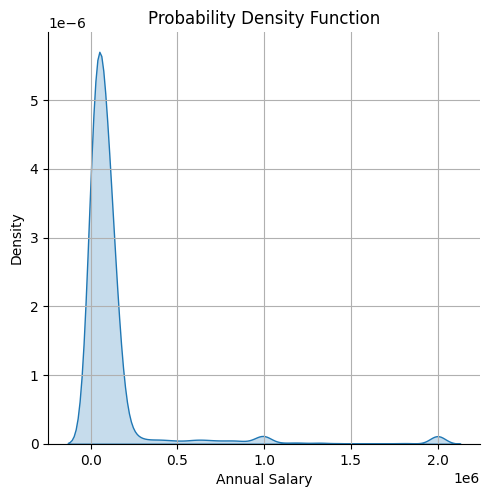

In [28]:
df_c = df['ConvertedComp']
df_new=df_c.fillna(df_c.mean())
plt.figure(figsize = (10, 5))
sns.displot(df_new, kind="kde", fill=True)
plt.title('Probability Density Function')
plt.xlabel('Annual Salary')
plt.grid()


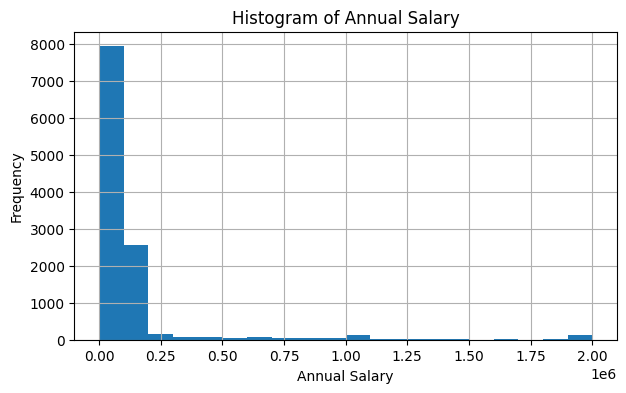

In [33]:
plt.figure(figsize = (7, 4))
df_new.plot(kind = 'hist', bins = 20)
plt.title('Histogram of Annual Salary')
plt.xlabel('Annual Salary')
plt.grid()

In [34]:
df_new.median()

63016.0

In [35]:
df['Gender'].value_counts()

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

57708.0


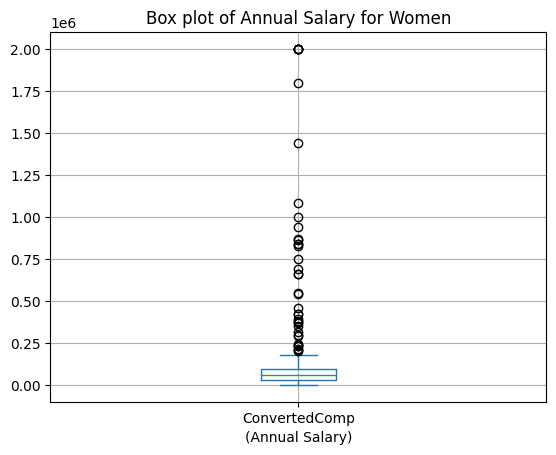

In [44]:
df_wom = df[df['Gender']=='Woman']['ConvertedComp']
df_wom.plot(kind='box')
plt.title('Box plot of Annual Salary for Women')
plt.xlabel('(Annual Salary)')
plt.grid()
print(df_wom.median())

In [37]:
df[['Age']].describe()

,Age
count,11111.000000
mean,30.778895
std,7.393686
min,16.000000
25%,25.000000
50%,29.000000
75%,35.000000
max,99.000000


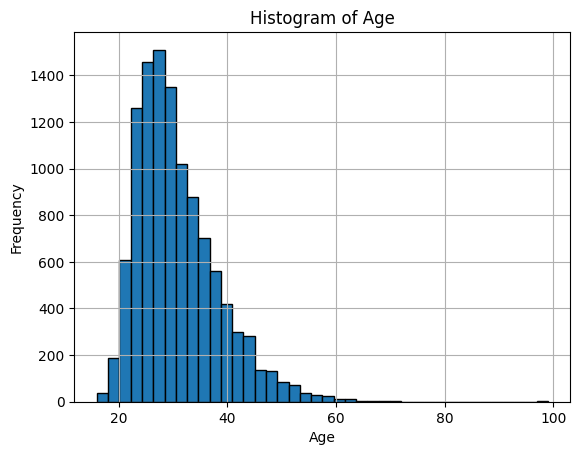

In [41]:
df['Age'].plot(kind='hist', bins=40, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.grid()

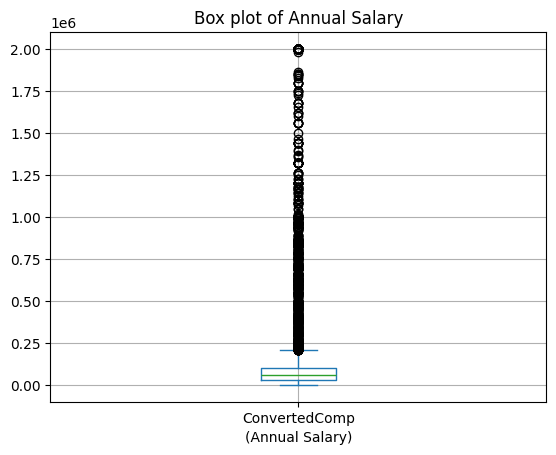

In [47]:
df_c.plot(kind = 'box')
plt.title('Box plot of Annual Salary')
plt.xlabel('(Annual Salary)')
plt.grid()

In [48]:
df_converted = df_c.to_frame().describe()
df_converted.reset_index()

,index,ConvertedComp
0,count,1.058200e+04
1,mean,1.315967e+05
2,std,2.947865e+05
3,min,0.000000e+00
4,25%,2.686800e+04
5,50%,5.774500e+04
6,75%,1.000000e+05
7,max,2.000000e+06


In [50]:
IQR = df_converted.iloc[6,0]-df_converted.iloc[4,0]
upper_bound = df_converted.iloc[6,0]+1.5*IQR
lower_bound = df_converted.iloc[4,0]-1.5*IQR
print(f"lower_bound is {lower_bound} and upper_bound is {upper_bound}")

lower_bound is -82830.0 and upper_bound is 209698.0


In [51]:
df_c = df['ConvertedComp']
len(df_c[df_c > upper_bound])

879

In [52]:
df_revised = df[(df['ConvertedComp']<upper_bound) & (df['ConvertedComp']>lower_bound)]
df_revised[['ConvertedComp']].describe()

,ConvertedComp
count,9703.000000
mean,59883.208389
std,43394.336755
min,0.000000
25%,24060.000000
50%,52704.000000
75%,85574.500000
max,209356.000000


In [55]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numeric_df.corr()
corr_matrix

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000
